In [13]:
import keras
import numpy as np
import matplotlib.pyplot as plt
fashion_mnist = keras.datasets.fashion_mnist
(xtrain_full, ytrain_full), (xtest_full, ytest_full) = fashion_mnist.load_data()
print(xtrain_full.shape)

x_valid, x_train = xtrain_full[:5000].astype('float32')/255.0, xtrain_full[5000:].astype('float32')/255.0
y_valid, y_train = ytrain_full[:5000], ytrain_full[5000:]

class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# img= np.asarray(x_train[0]).reshape(28,28)
# plt.imshow(img, cmap='binary')
# plt.show()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='selu',kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(100, activation='selu'),kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizers= 'Adam',
              metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint("my_keras_model.h5", 
                                            save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid),
                   callbacks=[checkpoint, early_stopping])



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 32)

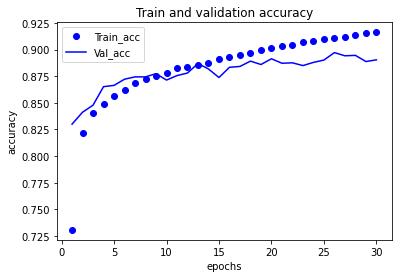

In [2]:
import matplotlib.pyplot as plt
history_dict= history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(acc) +1)
plt.plot(epochs, acc, 'bo', label="Train_acc" )
plt.plot(epochs, val_acc, 'b', label="Val_acc")
plt.title("Train and validation accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


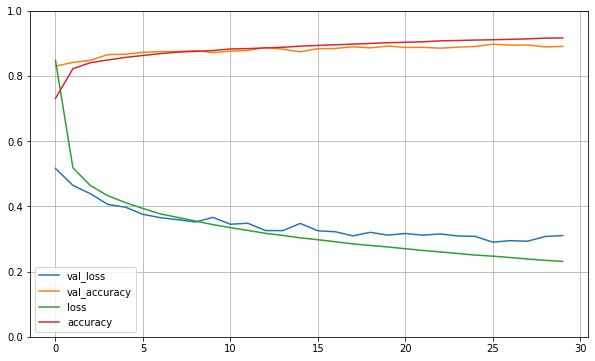

In [3]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(xtest_full, ytest_full)

10000/10000 [==============================] - 0s 24us/step


[86.95243373222351, 0.817799985408783]

In [8]:
import tensorflow.keras as keras

model_a = keras.models.load_model("my_keras_model")

[[1 2 3]
 [4 5 6]
 [7 8 9]]


[[1 2 3]
 [4 5 6]]
